In [8]:
# Importing Dependencies

import os
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [9]:
dir = r'E:\amruta\Downloads\pro\PRODIGY_ML_03-main\Dataset'


In [10]:
# Setting Path and Reshaping

categories = ['Cat', 'Dog']

data = []

for category in categories:
    path = os.path.join(dir, category)
    label = categories.index(category)

    for img in os.listdir(path):
        imgpath = os.path.join(path, img)
        pet_img = cv.imread(imgpath, 0)
        try:
            pet_img = cv.resize(pet_img, (100, 100), interpolation=cv.INTER_AREA)
            # print(pet_img.shape)
        except:
            break
        image = np.array(pet_img).flatten()
        data.append([image,label])

print(len(data))

8005


In [11]:
random.shuffle(data)

features = []
labels = []

for feature,label in data:
    features.append(feature)
    labels.append(label)

In [12]:
# Splitting the Dataset

x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.2)

In [13]:
# Training the model

model = SVC(C=1, kernel='poly', gamma='auto') 
model.fit(x_train,y_train)

SVC(C=1, gamma='auto', kernel='poly')

Accuracy : 0.589631480324797
Prediction is Cat


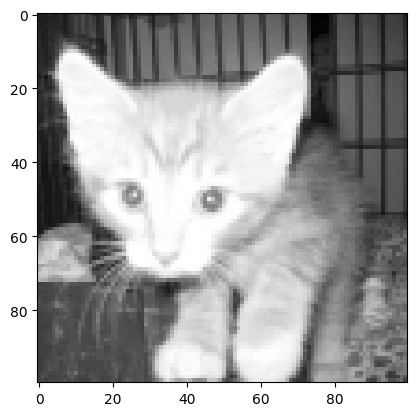

In [14]:
# Testing the model

mypet = x_test[2].reshape(100,100)
prediction = model.predict(x_test)
accuracy = model.score(x_test,y_test)
print('Accuracy :', accuracy)
print('Prediction is', categories[prediction[2]])
plt.imshow(mypet, cmap ='gray')
plt.show()